## 결정 트리 ( Decision Trees)
- 결정 트리는 분류와 회귀 문제에 널리 사용하는 모델  
- 기본적으로 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습  
- bears, hawks, penguins, dolphins 네 가지 동물을 구분한다고 가정  
- 우리의 목표는 가능한 한 적은 예/아니오 질문으로 문제를 해결하는 것  
- 날개가 있는 동물인지를 물어보면 가능성 있는 동물을 둘로 좁힐 수 있음  
- 대답이 "yes" 이면 다음엔 hawks와 penguins를 구분할 수 있는 질문을 해야 함  
- 예를 들면 날 수 있는 동물인지 물어봐야 함  
- 만약 날개가 없다면 가능한 동물은 bears, dolphins 임  
- 이 두 동물을 구분하기 위한 질문은 지느러미의 여부  
- 연속된 질문들을 결정 트리로 나타내면 다음과 같음

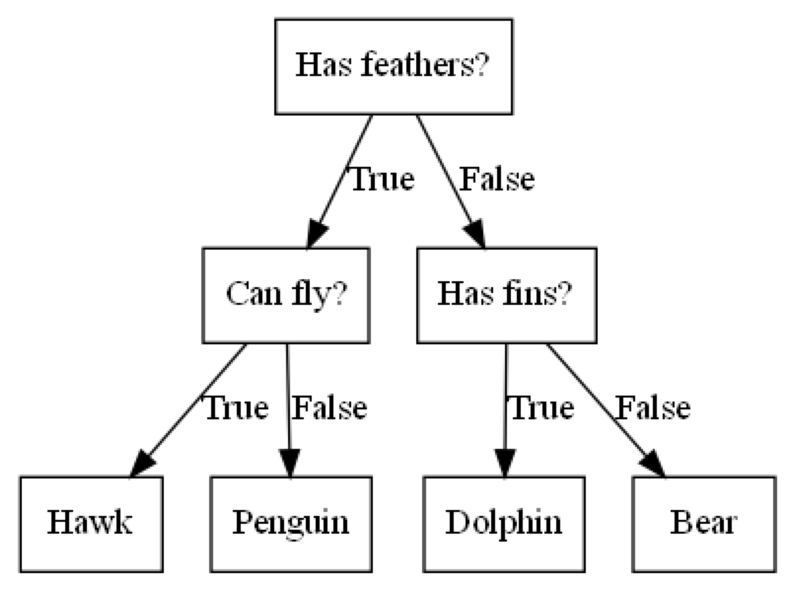

In [1]:
import mglearn
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8));
mglearn.plots.plot_animal_tree();
plt.show();

- 머신러닝 입장에서 말하자면, 세 개의 feature("Has feathers", "Can fly", "Has fins")를 사용해 네 개의 클래스("hwaks", "penguins", "dolphins", "bears")를 구분하는 모델을 만든 것임  
- 이런 모델을 직접 만드는 대신 지도 학습 방식으로 데이터로부터 학습을 시킬 수 있음

### 결정 트리 만들기
- 마지막 노드를 leaf node 라고 함  
- 타깃 하나로 이루어진 leaf node 를 순수 노드(pure node) 라고 함

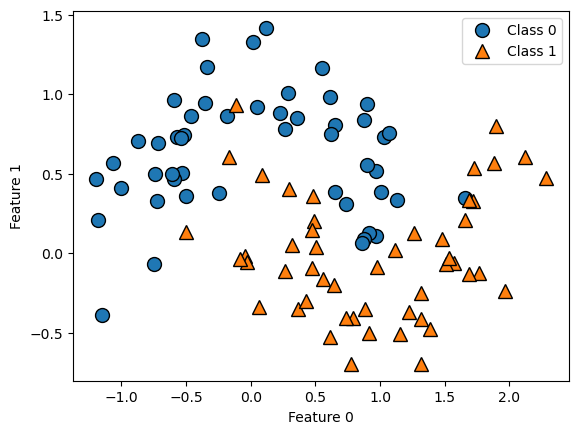

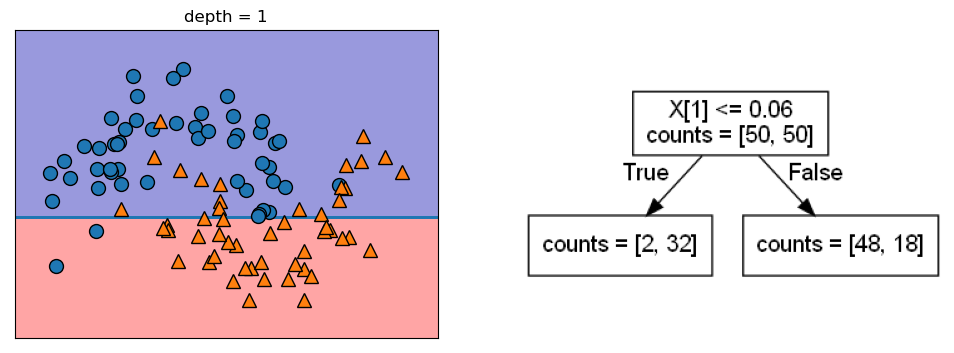

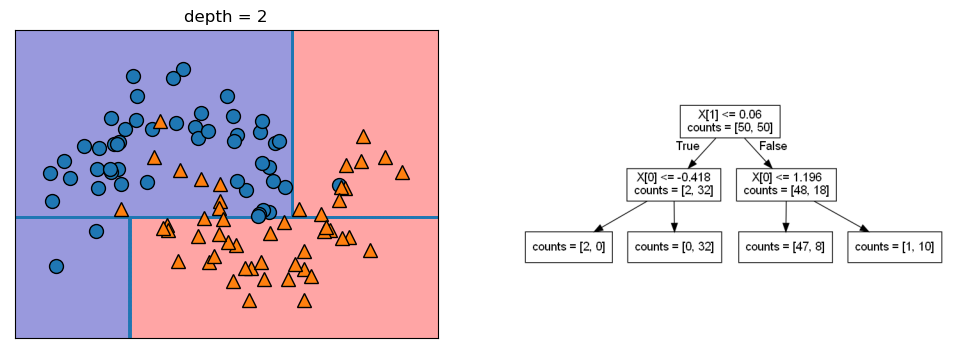

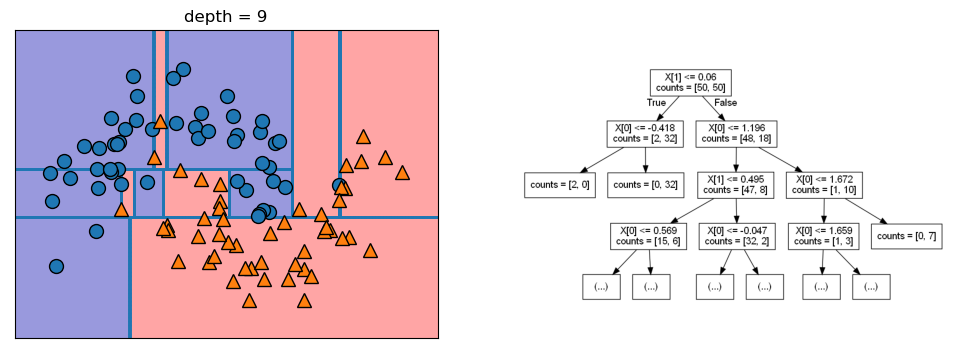

In [2]:
mglearn.plots.plot_tree_progressive();

### 결정 트리 복잡도 제어하기
- 일반적으로 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합됨  
- 순수 노드로 이루어진 결정 트리는 훈련 세트에 100% 정확하게 맞는다는 의미(훈련 세트의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있음)  
- 맨 마지막의 왼쪽 그림이 과대적합을 나타냄  
- 클래스 0으로 결정된 영역이 클래스 1에 속한 포인트들로 둘러쌓여 있음(또는 그 반대의 경우)  
- 이는 바람직한 결정 경계의 모습이 아님, 결정 경계가 클래스의 포인트들에서 멀리 떨어진 이상치(outlier) 하나에 너무 민감하기 때문

- 과대적합을 막는 전략은 크게 두 가지  
- 트리 생성을 일찍 중단하는 전략(사전 가지치기: pre-pruning)과  
- 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략(사후 가지치기: post-pruning 또는 그냥 가지치기:pruning)  
- 사전 가지치기 방법은 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 또는 노드가 분할하기 위한 포인트의 최소 수를 지정하는 것  
- scikit-learn 에서 결정 트리는 DecisionTreeRegressor 와 DecisionTreeClassifier 에 구현되어 있음  
- scikit-learn 은 사전 가지치기만 지원  
- 유방암 데이터셋을 이용한 사전 가지치기의 효과를 자세히 확인해 봄  
- 우선 기본값 설정으로 완전한 트리(모든 리프 노드가 순수 노드가 될 때까지 생성한 트리) 모델을 만듬